In [51]:
import pandas as pd 
import numpy as np

load dataset

In [52]:
df = pd.read_csv('Poultry_Chiken_Village.csv')
df.sample()

,Kota/Kabupaten,Populasi 2017,Populasi 2018,Produksi 2017,Produksi 2018,Skala Produksi,Unnamed: 6
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df = df.drop(['Kota/Kabupaten'], axis=1)

In [54]:
print(df.columns)

Index(['Populasi 2017', 'Populasi 2018', 'Produksi 2017', 'Produksi 2018',
       'Skala Produksi', 'Unnamed: 6'],
      dtype='object')


In [55]:
df = df.drop(['Unnamed: 6'], axis=1)

In [56]:
df.sample()

,Populasi 2017,Populasi 2018,Produksi 2017,Produksi 2018,Skala Produksi
30,"44,540","38,775","3,921,335","1,040,430",Tinggi


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Populasi 2017   38 non-null     object
 1   Populasi 2018   38 non-null     object
 2   Produksi 2017   38 non-null     object
 3   Produksi 2018   38 non-null     object
 4   Skala Produksi  38 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [58]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [59]:
numerical

[]

In [60]:
catgcols

['Populasi 2017',
 'Populasi 2018',
 'Produksi 2017',
 'Produksi 2018',
 'Skala Produksi']

In [61]:
df['Skala Produksi'].value_counts()

Rendah    21
Tinggi    19
Name: Skala Produksi, dtype: int64

In [11]:
df['Skala Produksi'] = df['Skala Produksi'].replace(['ckd\t'], 'ckd')

In [12]:
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [62]:
ind_col = [col for col in df.columns if col != 'Skala Produksi']
dep_col = 'Skala Produksi'

In [63]:
df[dep_col].value_counts()

Rendah    21
Tinggi    19
Name: Skala Produksi, dtype: int64

## transformasi data

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [65]:
df['Skala Produksi'] = le.fit_transform(df['Skala Produksi'])

In [66]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [67]:
df.head()

,Populasi 2017,Populasi 2018,Produksi 2017,Produksi 2018,Skala Produksi
0,0,8,2,2,1
1,30,33,22,5,0
2,37,0,3,3,1
3,17,16,30,32,1
4,15,17,6,17,1


In [68]:
df.to_csv('Poultry-ChikenVillage.csv',index=False)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## membuat model decision tree

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"clasification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 1.0
akurasi data testing = 0.75 

confusion matrix : 
[[4 2]
 [0 2]]

clasification report : 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.50      1.00      0.67         2

    accuracy                           0.75         8
   macro avg       0.75      0.83      0.73         8
weighted avg       0.88      0.75      0.77         8



## simulasi model

In [49]:
import pandas as pd
import numpy as np

df = pd.read_csv('Poultry_Chiken_Village.csv')

kota = df['Kota/Kabupaten']

input_data = (0,8,2,2)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print (f'Skala Produksi Ayam kampung di kota {kota[0]} rendah')
else:
    print (f'Skala Produksi Ayam kampung di kota {kota[0]} tinggi')

[1]
Skala Produksi Ayam kampung di kota Pacitan tinggi


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## visualisasi pohon keputusan

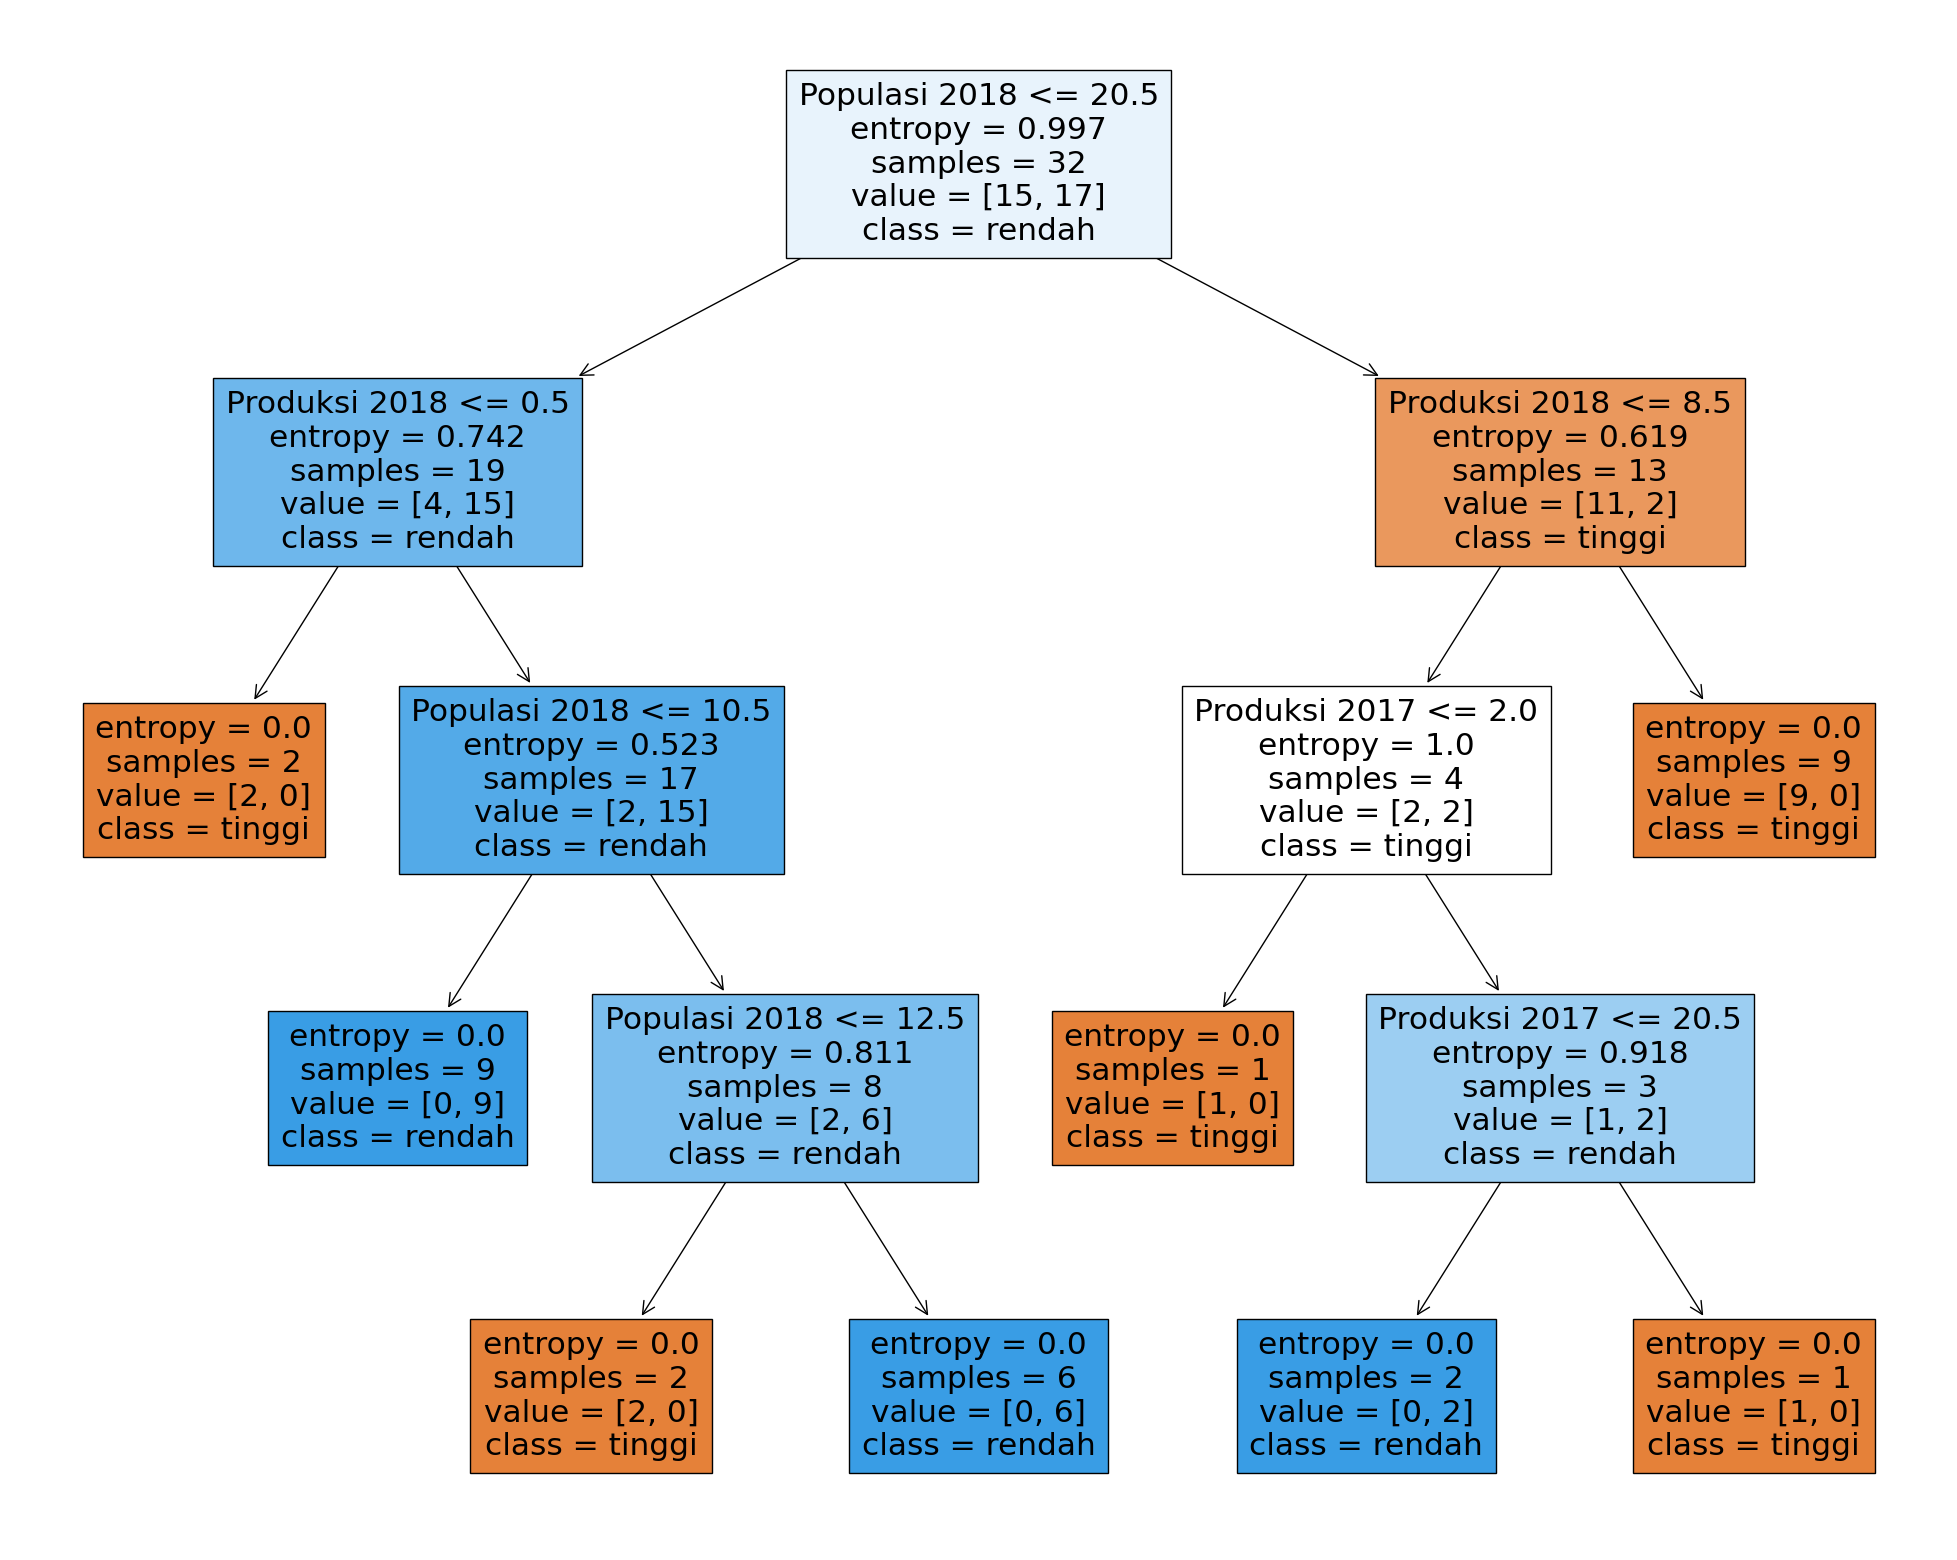

In [46]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                    feature_names=ind_col,
                    class_names=['tinggi','rendah'],
                    filled=True)